## Import necessary libaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV, train_test_split
import category_encoders as ce
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
import missingno
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

## Read the csv files

In [2]:
train_df = pd.read_csv('C:/Users/alimi/My Python Stuff/DAC-Perceptron/Train.csv')
test_df = pd.read_csv('C:/Users/alimi/My Python Stuff/DAC-Perceptron/Test.csv')

In [3]:
train_df.head()

,Unnamed: 0,time_date,site,continent_id,buyer_country,buyer_region,buyer_city,distance,buyer_id,mobile,package,channel_id,buying_date,dealing_date,adults,children,room,destination_id,destination_type,dealing,regency_continent,regency_country,regency_market,cnt,regency_cluster
0,0,8/11/2014 7:46,2,3,66,348,48862,2234.2641,12,0,1,9,8/27/2014,8/31/2014,2,0,1,8250,1,0,3,2,50,628,1
1,1,8/11/2014 8:22,2,3,66,348,48862,2234.2641,12,0,1,9,8/29/2014,9/2/2014,2,0,1,8250,1,1,1,2,50,628,1
2,2,8/11/2014 8:24,2,3,66,348,48862,2234.2641,12,0,0,9,8/29/2014,9/2/2014,2,0,1,8250,1,0,1,2,50,628,1
3,3,8/9/2014 18:05,2,3,66,442,35390,913.1932,93,0,0,3,11/23/2014,11/28/2014,2,0,1,14984,1,0,1,2,50,1457,80
4,4,8/9/2014 18:08,2,3,66,442,35390,913.6259,93,0,0,3,11/23/2014,11/28/2014,2,0,1,14984,1,0,1,2,50,1457,21


In [4]:
test_df.head()

,Unnamed: 0,id,time_date,site,continent_id,buyer_country,buyer_region,buyer_city,distance,buyer_id,mobile,package,channel_id,buying_date,dealing_date,adults,children,room,destination_id,destination_type,regency_continent,regency_country,regency_market
0,0,0,9/3/2015 17:09,2,3,66,174,37449,5539.0567,1,1,0,3,5/19/2016,5/23/2016,2,0,1,12243,6,6,204,27
1,1,1,9/24/2015 17:38,2,3,66,174,37449,5873.2923,1,1,0,10,5/12/2016,5/15/2016,2,0,1,14474,7,6,204,1540
2,2,2,6/7/2015 15:53,2,3,66,142,17440,3975.9776,20,0,0,1,7/26/2015,7/27/2015,4,0,1,11353,1,2,50,699
3,3,3,9/14/2015 14:49,2,3,66,258,34156,1508.5975,28,0,1,10,9/14/2015,9/16/2015,2,0,1,8250,1,2,50,628
4,4,4,7/17/2015 9:32,2,3,66,467,36345,66.7913,50,0,0,0,7/22/2015,7/23/2015,2,0,1,11812,1,2,50,538


# Exploratory Data Analysis

## Checking features consistency in training and testing dataset

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343583 entries, 0 to 343582
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         343583 non-null  int64  
 1   time_date          343583 non-null  object 
 2   site               343583 non-null  int64  
 3   continent_id       343583 non-null  int64  
 4   buyer_country      343583 non-null  int64  
 5   buyer_region       343583 non-null  int64  
 6   buyer_city         343583 non-null  int64  
 7   distance           145685 non-null  float64
 8   buyer_id           343583 non-null  int64  
 9   mobile             343583 non-null  int64  
 10  package            343583 non-null  int64  
 11  channel_id         343583 non-null  int64  
 12  buying_date        342885 non-null  object 
 13  dealing_date       342885 non-null  object 
 14  adults             343583 non-null  int64  
 15  children           343583 non-null  int64  
 16  ro

In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21018 entries, 0 to 21017
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         21018 non-null  int64  
 1   id                 21018 non-null  int64  
 2   time_date          21018 non-null  object 
 3   site               21018 non-null  int64  
 4   continent_id       21018 non-null  int64  
 5   buyer_country      21018 non-null  int64  
 6   buyer_region       21018 non-null  int64  
 7   buyer_city         21018 non-null  int64  
 8   distance           11167 non-null  float64
 9   buyer_id           21018 non-null  int64  
 10  mobile             21018 non-null  int64  
 11  package            21018 non-null  int64  
 12  channel_id         21018 non-null  int64  
 13  buying_date        21018 non-null  object 
 14  dealing_date       21018 non-null  object 
 15  adults             21018 non-null  int64  
 16  children           210

There's two missing features in test datasets. Might do predict the missing features with machine learning models on test datasets or dropping both of those features in training dataset. The two missing features are cnt and dealing.

In [7]:
# cnt and dealing will be dropped
train_df.drop(['cnt', 'dealing'], axis=1, inplace=True)

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343583 entries, 0 to 343582
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         343583 non-null  int64  
 1   time_date          343583 non-null  object 
 2   site               343583 non-null  int64  
 3   continent_id       343583 non-null  int64  
 4   buyer_country      343583 non-null  int64  
 5   buyer_region       343583 non-null  int64  
 6   buyer_city         343583 non-null  int64  
 7   distance           145685 non-null  float64
 8   buyer_id           343583 non-null  int64  
 9   mobile             343583 non-null  int64  
 10  package            343583 non-null  int64  
 11  channel_id         343583 non-null  int64  
 12  buying_date        342885 non-null  object 
 13  dealing_date       342885 non-null  object 
 14  adults             343583 non-null  int64  
 15  children           343583 non-null  int64  
 16  ro

In [9]:
submit_id = test_df['id']
test_df.drop('id', axis=1, inplace=True)

In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21018 entries, 0 to 21017
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         21018 non-null  int64  
 1   time_date          21018 non-null  object 
 2   site               21018 non-null  int64  
 3   continent_id       21018 non-null  int64  
 4   buyer_country      21018 non-null  int64  
 5   buyer_region       21018 non-null  int64  
 6   buyer_city         21018 non-null  int64  
 7   distance           11167 non-null  float64
 8   buyer_id           21018 non-null  int64  
 9   mobile             21018 non-null  int64  
 10  package            21018 non-null  int64  
 11  channel_id         21018 non-null  int64  
 12  buying_date        21018 non-null  object 
 13  dealing_date       21018 non-null  object 
 14  adults             21018 non-null  int64  
 15  children           21018 non-null  int64  
 16  room               210

## Detecting duplicate rows

In [11]:
train_df[train_df.duplicated()]

,Unnamed: 0,time_date,site,continent_id,buyer_country,buyer_region,buyer_city,distance,buyer_id,mobile,package,channel_id,buying_date,dealing_date,adults,children,room,destination_id,destination_type,regency_continent,regency_country,regency_market,regency_cluster


In [12]:
# Removing duplicate rows
train_df.drop_duplicates(inplace=True)

## Analysis on target label

In [13]:
cluster_list = train_df['regency_cluster'].unique().astype(int)

In [14]:
cluster_list.sort()

In [15]:
print(cluster_list)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


Target label contains values ranging from 0 to 99. In conclusion, there's 100 cluster of regency

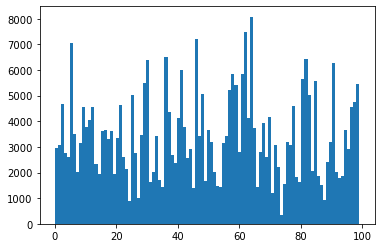

0     2959
1     3058
2     4671
3     2778
4     2610
5     7041
6     3510
7     2004
8     3169
9     4559
10    3769
11    4051
12    4561
13    2320
14    1935
15    3626
16    3649
17    3324
18    3606
19    1952
20    3356
21    4627
22    2587
23    2119
24     897
25    5009
26    2749
27     998
28    3457
29    5503
30    6386
31    1634
32    2001
33    3415
34    1704
35    1435
36    6491
37    4346
38    2690
39    2373
40    4124
41    6008
42    3778
43    2548
44    2922
45    1406
46    7195
47    3426
48    5057
49    1688
50    3656
51    3186
52    2029
53    1471
54    1450
55    3139
56    3408
57    5237
58    5850
59    5414
60    2808
61    5849
62    7486
63    4120
64    8077
65    3732
66    1440
67    2819
68    3918
69    2604
70    4163
71    1197
72    3085
73    2221
74     324
75    1565
76    3206
77    3091
78    4582
79    1827
80    1636
81    5649
82    6445
83    5021
84    2071
85    5562
86    1847
87    1503
88     920
89    2409
90    3192

In [16]:
# Distribution of target label cluster
plt.hist(train_df['regency_cluster'], bins=100)
plt.show();
train_df['regency_cluster'].value_counts().sort_index()

From the plot above, we can conclude that the amount of samples for each class is not evenly distributed because there's a couple of classes who have very low amount of samples which is cluster 74 with 324 samples. Meanwhile, clusster 64 has 8077 samples.

## Finding out the types of each features

In [17]:
# Features that contains information about time
temporal_features = [feature for feature in train_df.columns if ("date" in feature)]
print(f'Temporal features: {temporal_features}')

Temporal features: ['time_date', 'buying_date', 'dealing_date']


In [18]:
for feature in temporal_features:
      print(f'{feature} contains {train_df[feature].nunique()} unique values')

time_date contains 255587 unique values
buying_date contains 1076 unique values
dealing_date contains 1083 unique values


There's 3 features in this datasets that are temporal, which is time_date, buying_date, and dealing_date

In [19]:
# Finding out categorical features
feature_list = [feature for feature in train_df.columns if (feature not  in temporal_features)]
feature_list.pop(0)
for feature in feature_list:
    print(f'{feature} contains {train_df[feature].nunique()} unique values')

site contains 30 unique values
continent_id contains 5 unique values
buyer_country contains 155 unique values
buyer_region contains 653 unique values
buyer_city contains 7256 unique values
distance contains 98335 unique values
buyer_id contains 10000 unique values
mobile contains 2 unique values
package contains 2 unique values
channel_id contains 11 unique values
adults contains 10 unique values
children contains 9 unique values
room contains 9 unique values
destination_id contains 9831 unique values
destination_type contains 8 unique values
regency_continent contains 40 unique values
regency_country contains 6 unique values
regency_market contains 179 unique values
regency_cluster contains 100 unique values


In [20]:
count_unique = []
for i in feature_list:
    count_unique.append(train_df[i].nunique())

In [21]:
for feature in feature_list:
    if((feature != 'dealing') and (feature != 'cnt') and (feature != 'regency_cluster')):
        print(f'{feature} contains {test_df[feature].nunique()} unique values')

site contains 30 unique values
continent_id contains 5 unique values
buyer_country contains 128 unique values
buyer_region contains 528 unique values
buyer_city contains 4251 unique values
distance contains 11120 unique values
buyer_id contains 9864 unique values
mobile contains 2 unique values
package contains 2 unique values
channel_id contains 11 unique values
adults contains 10 unique values
children contains 8 unique values
room contains 9 unique values
destination_id contains 5237 unique values
destination_type contains 8 unique values
regency_continent contains 7 unique values
regency_country contains 153 unique values
regency_market contains 1663 unique values


From the results above, there's a couple of nominal categorical features that's is in integer data types. Those features are: <br>
site, continent_id, buyer_country, buyer_region, buyer_city, channel_id, destination_id, destination_type, regency_continent, regency_country, regency_market, and regency_cluster. <br>
But, from the categorical values that we observe in the test dataset, there's unseen categories in regency_country and regency_market so we need to handle those accordingly.

In [22]:
categorical_features = ["site", "continent_id", "buyer_country", "buyer_region", "buyer_city", "mobile", "package", "channel_id", "destination_id", "destination_type", "regency_continent", "regency_country", "regency_market"]

Distance, mobile, package, adults, children, and room will not be treated as categorical value. So we will treat it as it is (numerical features)

In [23]:
for feature in categorical_features:
    if (feature != 'regency_cluster'):
        un_list_1 = train_df[feature].unique()
        un_list_2 = test_df[feature].unique()
        un_list_1.sort()
        un_list_2.sort()
        if(np.array_equal(un_list_1, un_list_2)):
            print(f'{feature} has the same categories')
        else:
            print(f'{feature} has unseen categories')

site has unseen categories
continent_id has the same categories
buyer_country has unseen categories
buyer_region has unseen categories
buyer_city has unseen categories
mobile has the same categories
package has the same categories
channel_id has the same categories
destination_id has unseen categories
destination_type has the same categories
regency_continent has unseen categories
regency_country has unseen categories
regency_market has unseen categories


In [24]:
numerical_features = [feature for feature in train_df.columns if ((feature not in temporal_features) and (feature not in categorical_features) and (feature != "regency_cluster") and (feature != "Unnamed: 0") and (feature != "buyer_id"))]

In [25]:
print(numerical_features)

['distance', 'adults', 'children', 'room']


The dataset contains 3 string/object features and the rest is integer/float. The temporal features need to be engineered correctly to be usable in machine learning. Unnamed column and buyer_id will be removed from the dataset as we think those features won't affect the performance of the model.

In [26]:
train_df.drop('Unnamed: 0', axis=1, inplace=True)
test_df.drop('Unnamed: 0', axis=1, inplace=True)
train_df.drop('buyer_id', axis=1, inplace=True)
test_df.drop('buyer_id', axis=1, inplace=True)

## Checking feature's distribution

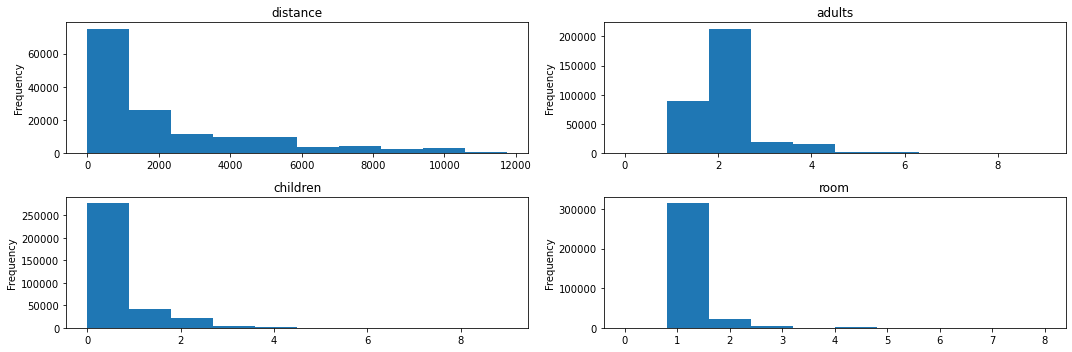

In [27]:
plt.figure(figsize=(15, 5))
i = 1
for feature in numerical_features:
    plt.subplot(2, 2, i)
    train_df[feature].plot(kind='hist')
    plt.title(feature)
    i = i + 1
plt.tight_layout()
plt.show()

All of the numerical features has some samples with extremely large values. But, since we are going to use tree based models, 

In [28]:
# checking distribution for categorical values in training dataset
for feature in categorical_features:
  print(f'Feature: {feature}')
  print(train_df[feature].value_counts(sort=True)/len(train_df)*100)

Feature: site
2     34.073281
24    32.263238
37     4.873349
23     4.647785
8      4.646039
13     3.496972
34     3.109874
11     2.557752
28     2.087996
25     1.138881
17     1.088529
30     0.915936
15     0.725298
33     0.720641
18     0.670580
35     0.600437
26     0.543100
20     0.388261
27     0.387388
22     0.356828
10     0.239244
31     0.147272
36     0.131264
7      0.117293
48     0.035217
6      0.018627
47     0.011351
46     0.006403
16     0.000582
19     0.000582
Name: site, dtype: float64
Feature: continent_id
3    39.741489
2    36.857761
1    17.037805
4     5.561975
0     0.800971
Name: continent_id, dtype: float64
Feature: buyer_country
66     30.449993
3      29.696754
205     5.442062
69      4.557560
1       4.535149
77      4.504297
46      3.270534
68      2.027458
23      1.226487
133     1.047491
195     0.941839
55      0.891197
194     0.878681
70      0.878099
215     0.863547
231     0.731119
119     0.674655
167     0.583556
202     0.496241
0

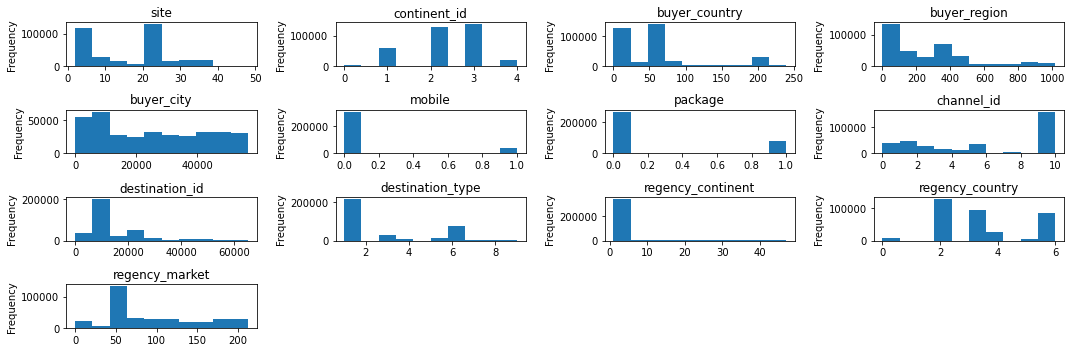

In [29]:
# for i in categorical_features:
#   plt.figure(figsize=(25, 5))
#   sns.barplot(train_df[i].value_counts().index, train_df[i].value_counts()).set_title(i)
#   plt.show();
plt.figure(figsize=(15, 5))
i = 1
for feature in categorical_features:
    plt.subplot(4, 4, i)
    train_df[feature].plot(kind='hist')
    plt.title(feature)
    i = i + 1
plt.tight_layout()
plt.show()

## Analyzing label and features

In [30]:
print(train_df[['regency_cluster', 'distance']].groupby(['regency_cluster'], as_index=False).mean().sort_values(by='regency_cluster'))

    regency_cluster     distance
0                 0  2132.479316
1                 1  1651.544879
2                 2  2375.275140
3                 3  2611.568367
4                 4  1412.462154
5                 5  2701.625278
6                 6  1661.024896
7                 7  1306.152610
8                 8  3635.577699
9                 9  2638.280193
10               10  2051.542483
11               11  2893.000133
12               12  4373.287708
13               13  1476.825065
14               14  1770.431050
15               15  2043.336554
16               16  1348.891228
17               17  2027.478471
18               18  1316.326445
19               19  1608.537189
20               20  2771.043805
21               21  1868.774743
22               22  3621.885940
23               23  1272.298624
24               24  1668.648056
25               25  2695.335125
26               26  2312.332534
27               27  5227.420322
28               28  1402.156599
29        

In [31]:
print(train_df[['regency_cluster', 'adults']].groupby(['regency_cluster'], as_index=False).mean().sort_values(by='regency_cluster'))

    regency_cluster    adults
0                 0  2.161203
1                 1  2.090582
2                 2  1.964033
3                 3  1.879410
4                 4  1.984291
5                 5  1.906121
6                 6  1.894872
7                 7  1.897705
8                 8  1.984853
9                 9  1.981356
10               10  1.878217
11               11  1.917304
12               12  1.682526
13               13  2.009483
14               14  1.821189
15               15  1.834253
16               16  1.938339
17               17  1.962094
18               18  2.011370
19               19  2.008197
20               20  1.995828
21               21  1.994813
22               22  1.994202
23               23  1.816895
24               24  2.150502
25               25  2.034338
26               26  2.111677
27               27  2.056112
28               28  1.995082
29               29  1.866073
30               30  1.873630
31               31  2.201346
32        

In [32]:
print(train_df[['regency_cluster', 'package']].groupby(['regency_cluster'], as_index=False).mean().sort_values(by='regency_cluster'))

    regency_cluster   package
0                 0  0.364312
1                 1  0.388816
2                 2  0.217084
3                 3  0.250540
4                 4  0.149042
5                 5  0.192018
6                 6  0.166667
7                 7  0.093812
8                 8  0.208899
9                 9  0.220443
10               10  0.165296
11               11  0.191804
12               12  0.256523
13               13  0.125862
14               14  0.115762
15               15  0.176503
16               16  0.144149
17               17  0.204573
18               18  0.146700
19               19  0.164447
20               20  0.212157
21               21  0.190620
22               22  0.223811
23               23  0.173667
24               24  0.337793
25               25  0.216610
26               26  0.437614
27               27  0.415832
28               28  0.124675
29               29  0.220970
30               30  0.193079
31               31  0.388005
32        

In [33]:
print(train_df[['regency_cluster', 'room']].groupby(['regency_cluster'], as_index=False).mean().sort_values(by='regency_cluster'))

    regency_cluster      room
0                 0  1.098006
1                 1  1.117724
2                 2  1.143224
3                 3  1.112671
4                 4  1.116092
5                 5  1.131799
6                 6  1.171225
7                 7  1.129242
8                 8  1.099716
9                 9  1.111867
10               10  1.129477
11               11  1.195260
12               12  1.106117
13               13  1.131466
14               14  1.082171
15               15  1.116657
16               16  1.146616
17               17  1.102888
18               18  1.123683
19               19  1.120389
20               20  1.102503
21               21  1.159715
22               22  1.112486
23               23  1.080698
24               24  1.089186
25               25  1.161110
26               26  1.085122
27               27  1.050100
28               28  1.154180
29               29  1.165183
30               30  1.118854
31               31  1.132803
32        

In [34]:
print(train_df[['regency_cluster', 'children']].groupby(['regency_cluster'], as_index=False).mean().sort_values(by='regency_cluster'))

    regency_cluster  children
0                 0  0.485299
1                 1  0.242642
2                 2  0.263755
3                 3  0.248740
4                 4  0.295019
5                 5  0.249396
6                 6  0.233333
7                 7  0.282435
8                 8  0.319028
9                 9  0.261680
10               10  0.247811
11               11  0.244137
12               12  0.119491
13               13  0.377586
14               14  0.180362
15               15  0.222008
16               16  0.275144
17               17  0.294224
18               18  0.372989
19               19  0.353484
20               20  0.263409
21               21  0.281824
22               22  0.265945
23               23  0.223218
24               24  0.244147
25               25  0.355161
26               26  0.506730
27               27  0.335671
28               28  0.341047
29               29  0.228966
30               30  0.196367
31               31  0.517748
32        

In [35]:
print(pd.pivot_table(train_df, index='regency_cluster', columns='site', values='package', aggfunc='count'))

site                 2    6     7      8     10     11     13     15   16  \
regency_cluster                                                             
0                1460.0  NaN   9.0  116.0   8.0   57.0   46.0    2.0  NaN   
1                1868.0  NaN   NaN   95.0   8.0  146.0  156.0    1.0  NaN   
2                1046.0  NaN  29.0  333.0   3.0   80.0  316.0   21.0  NaN   
3                 542.0  NaN   5.0  112.0  12.0   54.0  101.0   39.0  NaN   
4                1300.0  NaN   2.0  107.0   4.0  137.0   37.0    7.0  NaN   
5                1630.0  2.0   8.0  316.0  13.0  120.0  264.0   65.0  NaN   
6                1169.0  NaN   2.0  101.0   3.0  149.0   97.0   21.0  NaN   
7                 883.0  3.0   6.0   47.0   1.0   81.0   63.0   28.0  NaN   
8                 860.0  NaN   3.0  190.0   7.0  122.0  122.0   58.0  NaN   
9                1330.0  NaN  11.0  323.0   5.0  146.0  195.0   18.0  NaN   
10               1135.0  3.0   4.0  167.0   8.0  173.0  124.0   18.0  NaN   

## Looking for missing values

<AxesSubplot:>

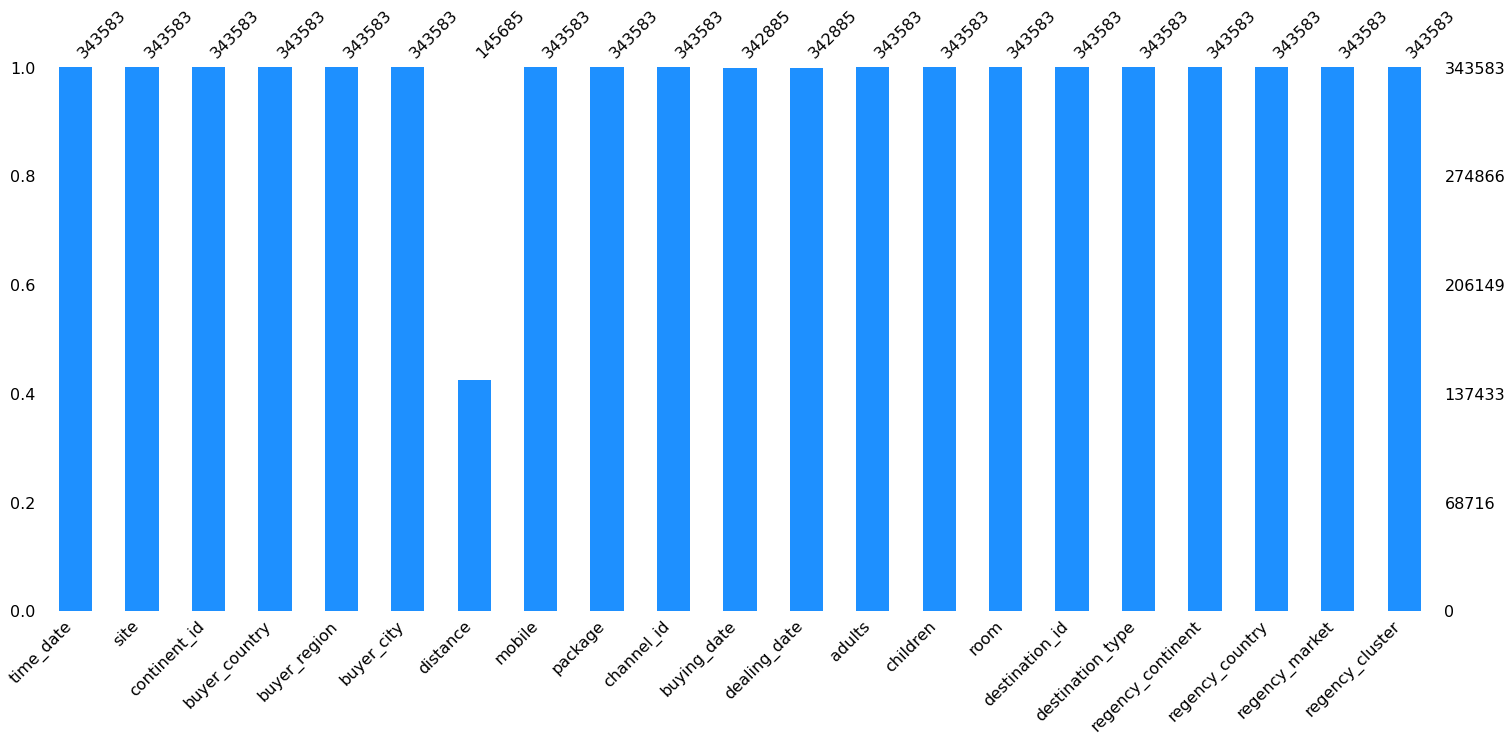

In [36]:
missingno.bar(train_df, color="dodgerblue")

<AxesSubplot:>

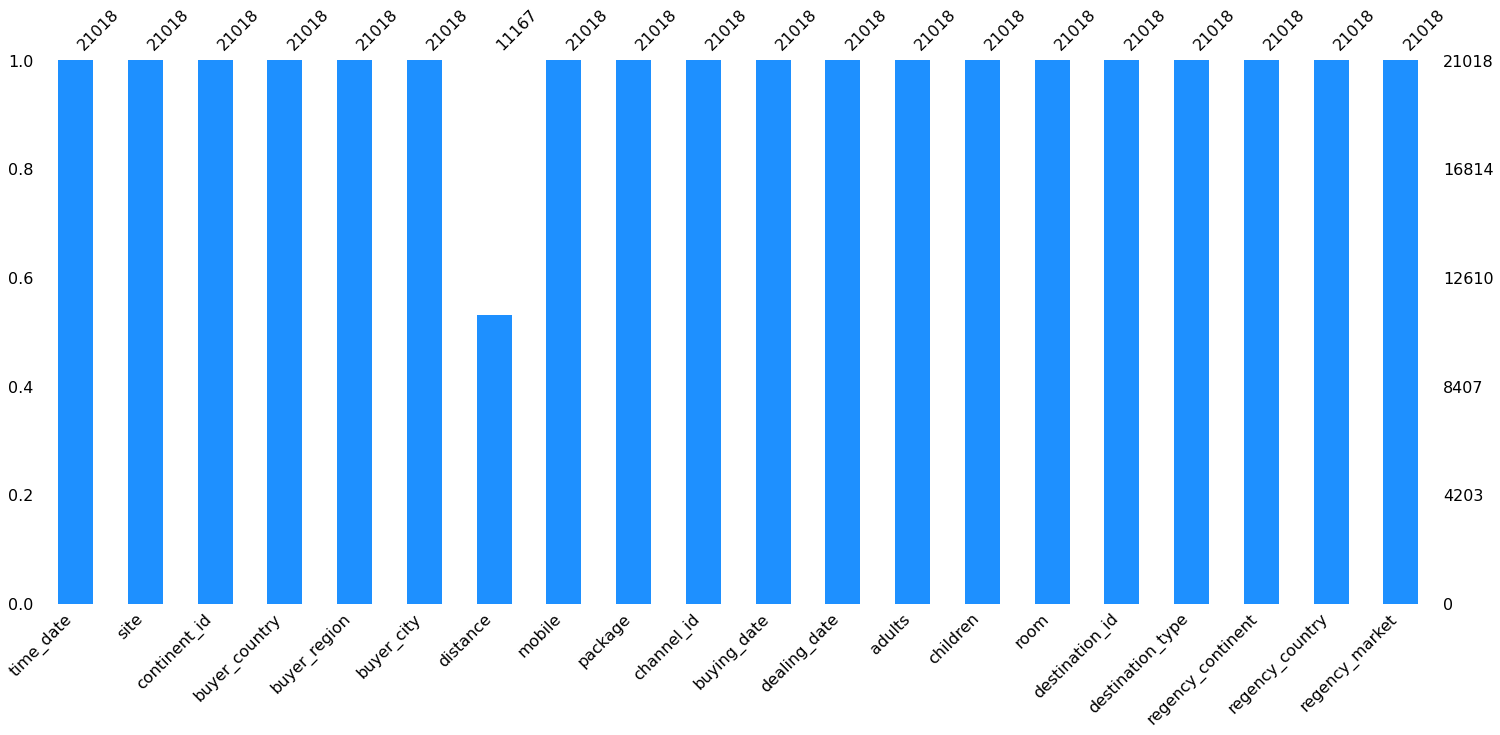

In [37]:
missingno.bar(test_df, color="dodgerblue")

In [38]:
# Function to calculate missing values
def missing_percentage(df):
    missing = df.isnull().sum()*100/len(df)
    print (missing[missing>0].sort_values())

In [39]:
missing_percentage(train_df)

buying_date      0.203153
dealing_date     0.203153
distance        57.598310
dtype: float64


In [40]:
missing_percentage(test_df)

distance    46.86935
dtype: float64


In [41]:
train_df[(train_df['buying_date'].isnull()) & (train_df['dealing_date'].isnull())]

,time_date,site,continent_id,buyer_country,buyer_region,buyer_city,distance,mobile,package,channel_id,buying_date,dealing_date,adults,children,room,destination_id,destination_type,regency_continent,regency_country,regency_market,regency_cluster
1671,6/10/2013 18:56,2,3,66,226,9427,1809.9688,0,1,2,NaN,NaN,2,0,1,9171,1,1,4,118,66
2474,12/19/2014 19:14,24,2,3,50,5703,NaN,1,0,2,NaN,NaN,2,1,1,8242,1,2,3,171,37
2819,4/4/2013 14:05,24,2,3,38,46556,NaN,0,0,9,NaN,NaN,2,0,1,8818,1,1,3,99,82
2822,4/9/2013 16:07,24,2,3,38,46556,NaN,0,0,9,NaN,NaN,2,0,1,8818,1,1,3,99,82
3009,10/9/2013 21:45,24,2,3,50,5703,NaN,0,0,1,NaN,NaN,2,0,1,8822,1,1,3,130,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336745,5/15/2013 11:47,2,3,66,467,36345,72.5636,1,0,9,NaN,NaN,2,0,1,27396,6,1,2,50,9
336746,5/15/2013 11:47,2,3,66,467,36345,74.1174,1,0,9,NaN,NaN,2,0,1,27396,6,2,2,50,25
339674,9/6/2013 23:02,2,3,66,174,43471,8669.2639,1,0,1,NaN,NaN,2,0,1,20116,6,2,3,5,26
339675,10/7/2013 23:11,2,3,66,174,24103,2452.4882,1,0,1,NaN,NaN,2,0,1,12233,6,1,2,50,69


The records that are missing buying_date and dealing_date is the same records

In [42]:
missing_percentage(test_df)

distance    46.86935
dtype: float64


C:\Users\alimi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'The amount of missing distance values in each region clusters'}>

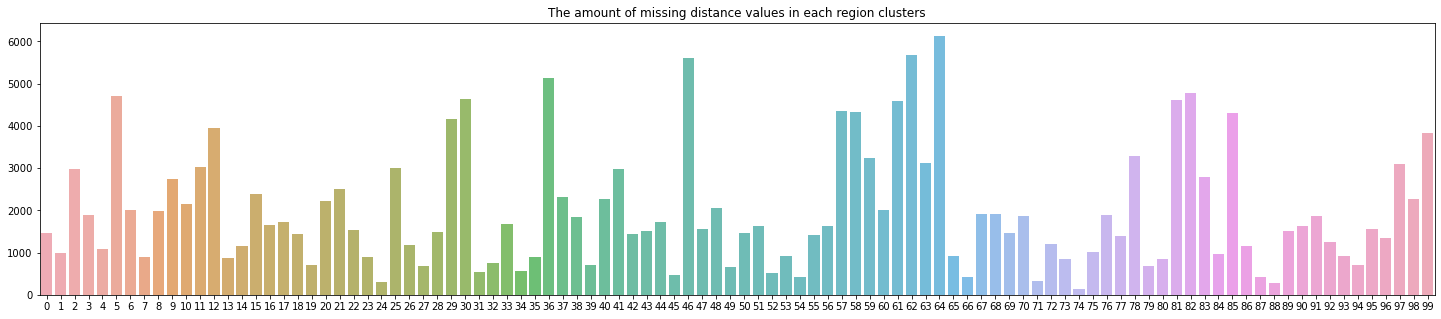

In [43]:
cluster_distance_missing = train_df[train_df['distance'].isnull()]["regency_cluster"].value_counts()
plt.figure(figsize=(25, 5))
plt.title('The amount of missing distance values in each region clusters')
sns.barplot(cluster_distance_missing.index, cluster_distance_missing.values, alpha=0.8)

Each regency cluster has missing distance value, so it's not missing only for some specific clusters

## Detect Outliers

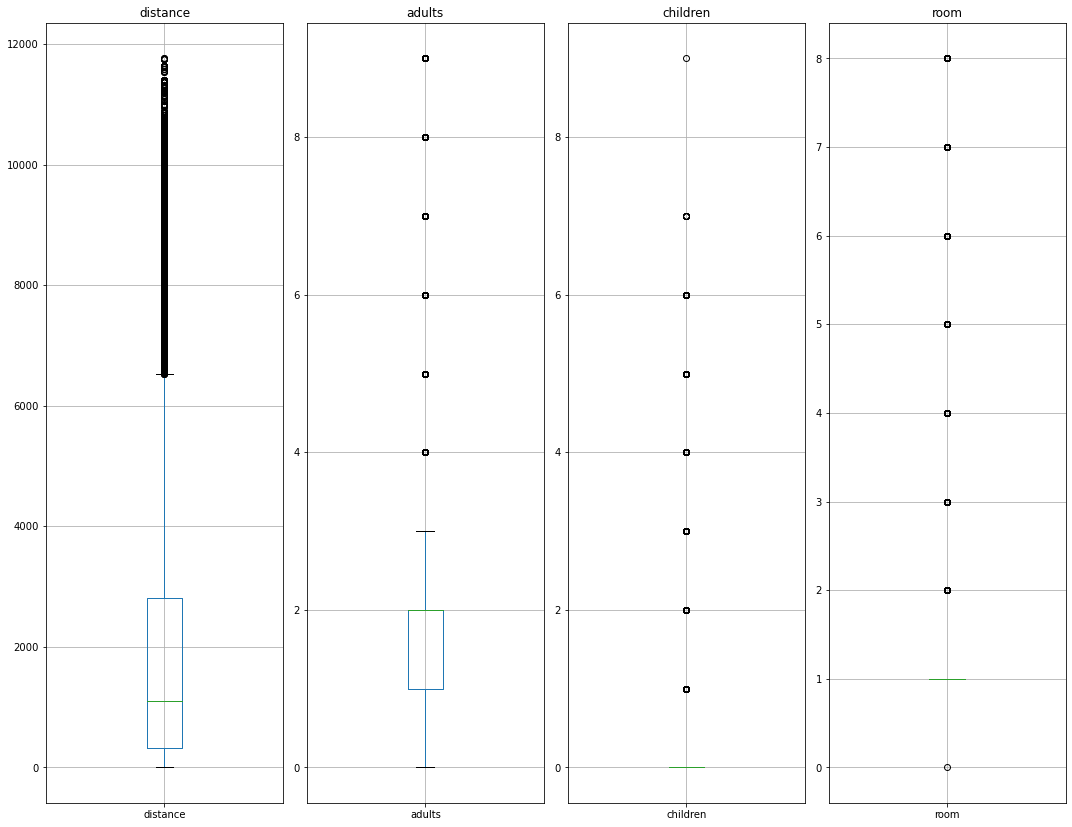

In [44]:
plt.figure(figsize=(15, 45))
i = 1
for feature in numerical_features:
    plt.subplot(4, 4, i)
    train_df.boxplot(column=feature)
    plt.title(feature)
    i = i + 1
plt.tight_layout()
plt.show()

## Data Cleaning

In [45]:
train_df['buying_date'].fillna(train_df['buying_date'].mode()[0], inplace=True)
train_df['dealing_date'].fillna(train_df['dealing_date'].mode()[0], inplace=True)

In [46]:
missing_percentage(train_df)

distance    57.59831
dtype: float64


## Feature engineering on date features

In [47]:
temporal_features

['time_date', 'buying_date', 'dealing_date']

In [48]:
for feature in temporal_features:
  train_df[feature] = pd.to_datetime(train_df[feature])
  test_df[feature] = pd.to_datetime(test_df[feature])

In [49]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 343583 entries, 0 to 343582
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   time_date          343583 non-null  datetime64[ns]
 1   site               343583 non-null  int64         
 2   continent_id       343583 non-null  int64         
 3   buyer_country      343583 non-null  int64         
 4   buyer_region       343583 non-null  int64         
 5   buyer_city         343583 non-null  int64         
 6   distance           145685 non-null  float64       
 7   mobile             343583 non-null  int64         
 8   package            343583 non-null  int64         
 9   channel_id         343583 non-null  int64         
 10  buying_date        343583 non-null  datetime64[ns]
 11  dealing_date       343583 non-null  datetime64[ns]
 12  adults             343583 non-null  int64         
 13  children           343583 non-null  int64   

In [50]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21018 entries, 0 to 21017
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   time_date          21018 non-null  datetime64[ns]
 1   site               21018 non-null  int64         
 2   continent_id       21018 non-null  int64         
 3   buyer_country      21018 non-null  int64         
 4   buyer_region       21018 non-null  int64         
 5   buyer_city         21018 non-null  int64         
 6   distance           11167 non-null  float64       
 7   mobile             21018 non-null  int64         
 8   package            21018 non-null  int64         
 9   channel_id         21018 non-null  int64         
 10  buying_date        21018 non-null  datetime64[ns]
 11  dealing_date       21018 non-null  datetime64[ns]
 12  adults             21018 non-null  int64         
 13  children           21018 non-null  int64         
 14  room  

In [51]:
train_df['buy_deal_diff'] = (train_df['dealing_date'] - train_df['buying_date']).dt.days
test_df['buy_deal_diff'] = (test_df['dealing_date'] - test_df['buying_date']).dt.days

In [52]:
train_df

,time_date,site,continent_id,buyer_country,buyer_region,buyer_city,distance,mobile,package,channel_id,buying_date,dealing_date,adults,children,room,destination_id,destination_type,regency_continent,regency_country,regency_market,regency_cluster,buy_deal_diff
0,2014-08-11 07:46:00,2,3,66,348,48862,2234.2641,0,1,9,2014-08-27,2014-08-31,2,0,1,8250,1,3,2,50,1,4
1,2014-08-11 08:22:00,2,3,66,348,48862,2234.2641,0,1,9,2014-08-29,2014-09-02,2,0,1,8250,1,1,2,50,1,4
2,2014-08-11 08:24:00,2,3,66,348,48862,2234.2641,0,0,9,2014-08-29,2014-09-02,2,0,1,8250,1,1,2,50,1,4
3,2014-08-09 18:05:00,2,3,66,442,35390,913.1932,0,0,3,2014-11-23,2014-11-28,2,0,1,14984,1,1,2,50,80,5
4,2014-08-09 18:08:00,2,3,66,442,35390,913.6259,0,0,3,2014-11-23,2014-11-28,2,0,1,14984,1,1,2,50,21,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343578,2014-01-27 19:21:00,37,1,69,648,6514,NaN,1,1,9,2014-08-30,2014-09-01,4,0,2,172,1,1,2,50,94,2
343579,2014-01-27 19:27:00,37,1,69,648,6514,NaN,1,1,9,2014-08-30,2014-09-01,4,0,2,8277,1,1,2,50,70,2
343580,2014-01-27 19:38:00,37,1,69,648,6514,NaN,1,1,9,2014-08-30,2014-09-01,4,0,2,32726,4,1,2,50,18,2
343581,2014-01-27 19:45:00,37,1,69,648,6514,NaN,1,1,9,2014-08-30,2014-09-01,4,0,2,12010,1,1,2,50,91,2


In [53]:
for feature in temporal_features:
  train_df[feature+'_year'] = train_df[feature].dt.year
  categorical_features.append(feature+'_year')
  train_df[feature+'_month'] = train_df[feature].dt.month
  categorical_features.append(feature+'_month')
  train_df[feature+'_day'] = train_df[feature].dt.day
  categorical_features.append(feature+'_day')
  train_df[feature+'_weekday'] = train_df[feature].dt.weekday
  categorical_features.append(feature+'_weekday')
  test_df[feature+'_year'] = test_df[feature].dt.year
  test_df[feature+'_month'] = test_df[feature].dt.month
  test_df[feature+'_day'] = test_df[feature].dt.day
  test_df[feature+'_weekday'] = test_df[feature].dt.weekday
  

In [54]:
train_df

,time_date,site,continent_id,buyer_country,buyer_region,buyer_city,distance,mobile,package,channel_id,buying_date,dealing_date,adults,children,room,destination_id,destination_type,regency_continent,regency_country,regency_market,regency_cluster,buy_deal_diff,time_date_year,time_date_month,time_date_day,time_date_weekday,buying_date_year,buying_date_month,buying_date_day,buying_date_weekday,dealing_date_year,dealing_date_month,dealing_date_day,dealing_date_weekday
0,2014-08-11 07:46:00,2,3,66,348,48862,2234.2641,0,1,9,2014-08-27,2014-08-31,2,0,1,8250,1,3,2,50,1,4,2014,8,11,0,2014,8,27,2,2014,8,31,6
1,2014-08-11 08:22:00,2,3,66,348,48862,2234.2641,0,1,9,2014-08-29,2014-09-02,2,0,1,8250,1,1,2,50,1,4,2014,8,11,0,2014,8,29,4,2014,9,2,1
2,2014-08-11 08:24:00,2,3,66,348,48862,2234.2641,0,0,9,2014-08-29,2014-09-02,2,0,1,8250,1,1,2,50,1,4,2014,8,11,0,2014,8,29,4,2014,9,2,1
3,2014-08-09 18:05:00,2,3,66,442,35390,913.1932,0,0,3,2014-11-23,2014-11-28,2,0,1,14984,1,1,2,50,80,5,2014,8,9,5,2014,11,23,6,2014,11,28,4
4,2014-08-09 18:08:00,2,3,66,442,35390,913.6259,0,0,3,2014-11-23,2014-11-28,2,0,1,14984,1,1,2,50,21,5,2014,8,9,5,2014,11,23,6,2014,11,28,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343578,2014-01-27 19:21:00,37,1,69,648,6514,NaN,1,1,9,2014-08-30,2014-09-01,4,0,2,172,1,1,2,50,94,2,2014,1,27,0,2014,8,30,5,2014,9,1,0
343579,2014-01-27 19:27:00,37,1,69,648,6514,NaN,1,1,9,2014-08-30,2014-09-01,4,0,2,8277,1,1,2,50,70,2,2014,1,27,0,2014,8,30,5,2014,9,1,0
343580,2014-01-27 19:38:00,37,1,69,648,6514,NaN,1,1,9,2014-08-30,2014-09-01,4,0,2,32726,4,1,2,50,18,2,2014,1,27,0,2014,8,30,5,2014,9,1,0
343581,2014-01-27 19:45:00,37,1,69,648,6514,NaN,1,1,9,2014-08-30,2014-09-01,4,0,2,12010,1,1,2,50,91,2,2014,1,27,0,2014,8,30,5,2014,9,1,0


In [55]:
train_df['buying_date_weekend'] = np.where(train_df['buying_date_weekday'].isin([5,6]), 1,0)
train_df['dealing_date_weekend'] = np.where(train_df['dealing_date_weekday'].isin([5,6]), 1,0)
train_df['buying_date_year_start'] = train_df['buying_date'].dt.is_year_start
train_df['buying_date_quarter_start'] = train_df['buying_date'].dt.is_quarter_start
train_df['buying_date_month_start'] = train_df['buying_date'].dt.is_month_start
train_df['buying_date_month_end'] = train_df['buying_date'].dt.is_month_end
train_df['dealing_date_year_start'] = train_df['dealing_date'].dt.is_year_start
train_df['dealing_date_quarter_start'] = train_df['dealing_date'].dt.is_quarter_start
train_df['dealing_date_month_start'] = train_df['dealing_date'].dt.is_month_start
train_df['dealing_date_month_end'] = train_df['dealing_date'].dt.is_month_end

test_df['buying_date_weekend'] = np.where(test_df['buying_date_weekday'].isin([5,6]), 1,0)
test_df['dealing_date_weekend'] = np.where(test_df['dealing_date_weekday'].isin([5,6]), 1,0)
test_df['buying_date_year_start'] = test_df['buying_date'].dt.is_year_start
test_df['buying_date_quarter_start'] = test_df['buying_date'].dt.is_quarter_start
test_df['buying_date_month_start'] = test_df['buying_date'].dt.is_month_start
test_df['buying_date_month_end'] = test_df['buying_date'].dt.is_month_end
test_df['dealing_date_year_start'] = test_df['dealing_date'].dt.is_year_start
test_df['dealing_date_quarter_start'] = test_df['dealing_date'].dt.is_quarter_start
test_df['dealing_date_month_start'] = test_df['dealing_date'].dt.is_month_start
test_df['dealing_date_month_end'] = test_df['dealing_date'].dt.is_month_end

In [56]:
train_df

,time_date,site,continent_id,buyer_country,buyer_region,buyer_city,distance,mobile,package,channel_id,buying_date,dealing_date,adults,children,room,destination_id,destination_type,regency_continent,regency_country,regency_market,regency_cluster,buy_deal_diff,time_date_year,time_date_month,time_date_day,time_date_weekday,buying_date_year,buying_date_month,buying_date_day,buying_date_weekday,dealing_date_year,dealing_date_month,dealing_date_day,dealing_date_weekday,buying_date_weekend,dealing_date_weekend,buying_date_year_start,buying_date_quarter_start,buying_date_month_start,buying_date_month_end,dealing_date_year_start,dealing_date_quarter_start,dealing_date_month_start,dealing_date_month_end
0,2014-08-11 07:46:00,2,3,66,348,48862,2234.2641,0,1,9,2014-08-27,2014-08-31,2,0,1,8250,1,3,2,50,1,4,2014,8,11,0,2014,8,27,2,2014,8,31,6,0,1,False,False,False,False,False,False,False,True
1,2014-08-11 08:22:00,2,3,66,348,48862,2234.2641,0,1,9,2014-08-29,2014-09-02,2,0,1,8250,1,1,2,50,1,4,2014,8,11,0,2014,8,29,4,2014,9,2,1,0,0,False,False,False,False,False,False,False,False
2,2014-08-11 08:24:00,2,3,66,348,48862,2234.2641,0,0,9,2014-08-29,2014-09-02,2,0,1,8250,1,1,2,50,1,4,2014,8,11,0,2014,8,29,4,2014,9,2,1,0,0,False,False,False,False,False,False,False,False
3,2014-08-09 18:05:00,2,3,66,442,35390,913.1932,0,0,3,2014-11-23,2014-11-28,2,0,1,14984,1,1,2,50,80,5,2014,8,9,5,2014,11,23,6,2014,11,28,4,1,0,False,False,False,False,False,False,False,False
4,2014-08-09 18:08:00,2,3,66,442,35390,913.6259,0,0,3,2014-11-23,2014-11-28,2,0,1,14984,1,1,2,50,21,5,2014,8,9,5,2014,11,23,6,2014,11,28,4,1,0,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343578,2014-01-27 19:21:00,37,1,69,648,6514,NaN,1,1,9,2014-08-30,2014-09-01,4,0,2,172,1,1,2,50,94,2,2014,1,27,0,2014,8,30,5,2014,9,1,0,1,0,False,False,False,False,False,False,True,False
343579,2014-01-27 19:27:00,37,1,69,648,6514,NaN,1,1,9,2014-08-30,2014-09-01,4,0,2,8277,1,1,2,50,70,2,2014,1,27,0,2014,8,30,5,2014,9,1,0,1,0,False,False,False,False,False,False,True,False
343580,2014-01-27 19:38:00,37,1,69,648,6514,NaN,1,1,9,2014-08-30,2014-09-01,4,0,2,32726,4,1,2,50,18,2,2014,1,27,0,2014,8,30,5,2014,9,1,0,1,0,False,False,False,False,False,False,True,False
343581,2014-01-27 19:45:00,37,1,69,648,6514,NaN,1,1,9,2014-08-30,2014-09-01,4,0,2,12010,1,1,2,50,91,2,2014,1,27,0,2014,8,30,5,2014,9,1,0,1,0,False,False,False,False,False,False,True,False


In [57]:
train_df.drop(temporal_features, axis=1, inplace=True)

In [58]:
test_df.drop(temporal_features, axis=1, inplace=True)

## Feature engineering on distance features

In [59]:
bins = [0, 2000, 4000, 6000, 8000, 10000, np.inf]
names = ['<2000', '2000-4000', '4000-6000', '6000-8000', '8000-10000', '10000++']

train_df['distance_range'] = pd.cut(train_df['distance'], bins, labels=names)
test_df['distance_range'] = pd.cut(test_df['distance'], bins, labels=names)

In [60]:
train_df['distance_range']=(train_df['distance_range'].cat.add_categories('missing values').fillna('missing values'))
test_df['distance_range']=(test_df['distance_range'].cat.add_categories('missing values').fillna('missing values'))

In [61]:
train_df.drop('distance', axis=1, inplace=True)
test_df.drop('distance', axis=1, inplace=True)

## Analysis on temporal features

C:\Users\alimi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\alimi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\alimi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\alimi\anacond

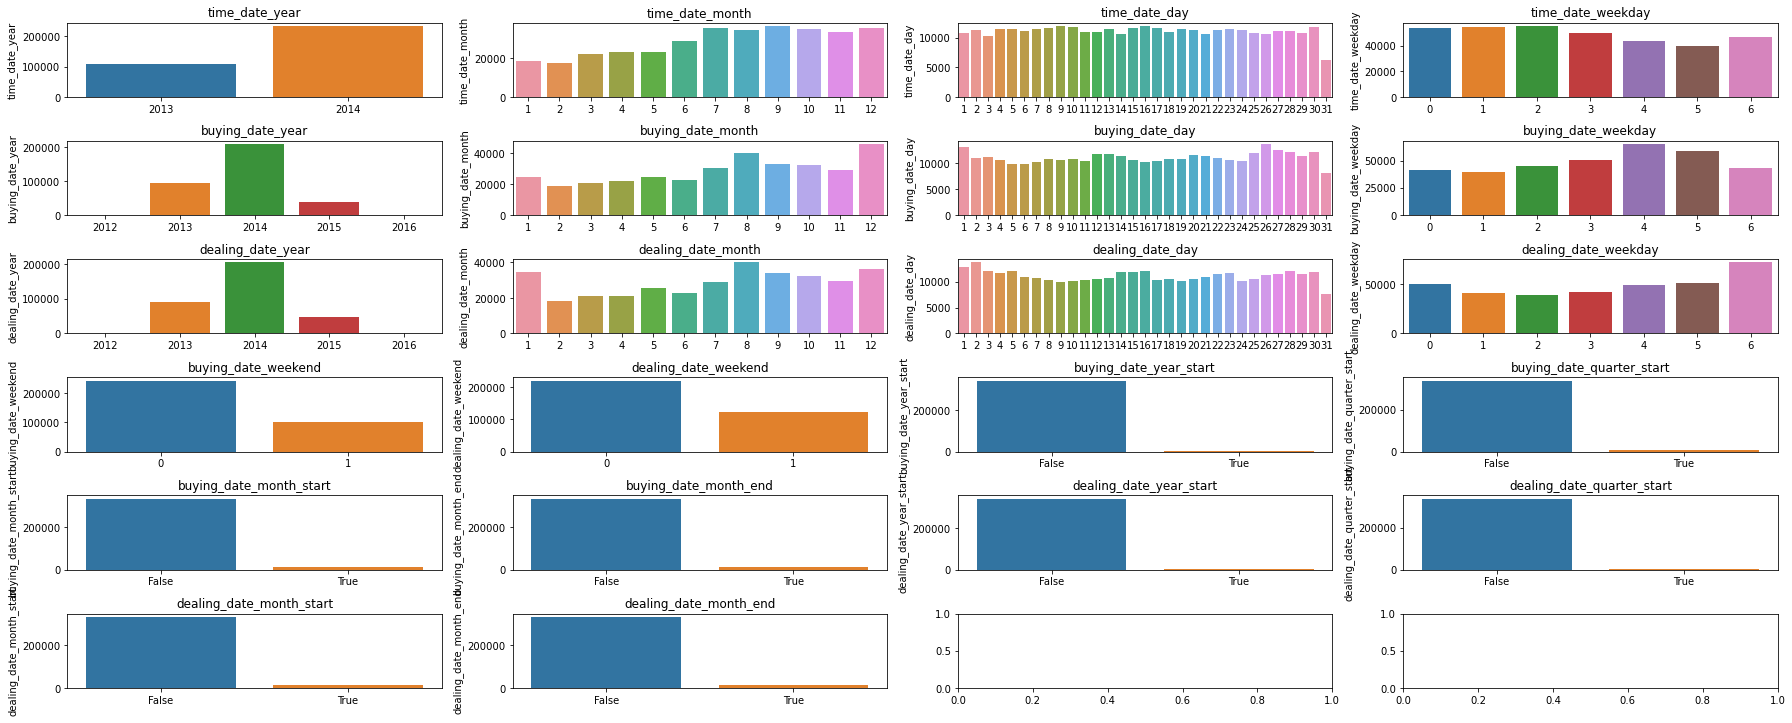

In [62]:
f, axes = plt.subplots(6, 4, figsize=[25,10])
axes = axes.flatten()
x=0
for i in train_df.columns:
    if ('date' in i):
        sns.barplot(train_df[i].value_counts().index, train_df[i].value_counts(), ax= axes[x]).set_title(i)
        x = x+1
plt.tight_layout()
plt.show();

## Finding out correlation of each features

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

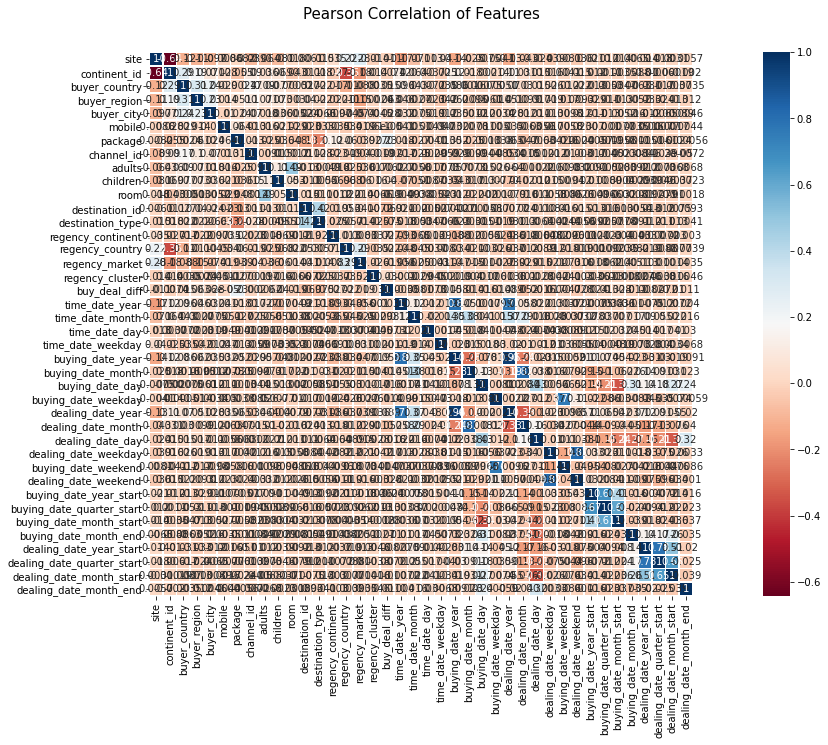

In [63]:
colormap = plt.cm.RdBu
plt.figure(figsize=(25,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train_df.corr(),linewidths=0.5,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

## Feature engineering to map rare categorical features

In [64]:
# Change the data types of features with rare categories with string
features_with_rare_categories = ['site', 'buyer_country', 'regency_continent', 'regency_market', "buyer_region", "buyer_city", "destination_id", 'regency_country']
for feature in features_with_rare_categories:
    train_df[feature] = train_df[feature].astype('object')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 343583 entries, 0 to 343582
Data columns (total 41 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   site                        343583 non-null  object  
 1   continent_id                343583 non-null  int64   
 2   buyer_country               343583 non-null  object  
 3   buyer_region                343583 non-null  object  
 4   buyer_city                  343583 non-null  object  
 5   mobile                      343583 non-null  int64   
 6   package                     343583 non-null  int64   
 7   channel_id                  343583 non-null  int64   
 8   adults                      343583 non-null  int64   
 9   children                    343583 non-null  int64   
 10  room                        343583 non-null  int64   
 11  destination_id              343583 non-null  object  
 12  destination_type            343583 non-null  int64   
 13 

In [65]:
# less than 1% -> others
features_with_rare_categories_1 = ['site', 'buyer_country', 'regency_continent', 'regency_market']
# less than 0.1% -> others
features_with_rare_categories_2 = ["buyer_region", "buyer_city", "destination_id"]
# less than 1.1% -> others
features_with_rare_categories_3 = ['regency_country']
def frequent_cat(df, var, rare_perc):
  df = df.copy()
  tmp = df.groupby(var)['mobile'].count() / len(df)
  return tmp[tmp>rare_perc].index

for feature in features_with_rare_categories_1:
  freq_feat_list = frequent_cat(train_df, feature, 0.01)
  train_df[feature] = np.where(train_df[feature].isin(freq_feat_list), train_df[feature], 'Others')
  test_df[feature] = np.where(test_df[feature].isin(freq_feat_list), test_df[feature], 'Others')

for feature in features_with_rare_categories_2:
  freq_feat_list = frequent_cat(train_df, feature, 0.001)
  train_df[feature] = np.where(train_df[feature].isin(freq_feat_list), train_df[feature], 'Others')
  test_df[feature] = np.where(test_df[feature].isin(freq_feat_list), test_df[feature], 'Others')

for feature in features_with_rare_categories_3:
  freq_feat_list = frequent_cat(train_df, feature, 0.011)
  train_df[feature] = np.where(train_df[feature].isin(freq_feat_list), train_df[feature], 'Others')
  test_df[feature] = np.where(test_df[feature].isin(freq_feat_list), test_df[feature], 'Others')

## Encode Categorical Features

In [66]:
binary_encoder_1= ce.BinaryEncoder(cols=['site'],return_df=True)
binary_encoder_2= ce.BinaryEncoder(cols=['buyer_region'],return_df=True)
binary_encoder_3= ce.BinaryEncoder(cols=['buyer_country'],return_df=True)
binary_encoder_4= ce.BinaryEncoder(cols=['regency_continent'],return_df=True)
binary_encoder_5= ce.BinaryEncoder(cols=['buyer_city'],return_df=True)
binary_encoder_6= ce.BinaryEncoder(cols=['regency_market'],return_df=True)
binary_encoder_7= ce.BinaryEncoder(cols=['destination_id'],return_df=True)
binary_encoder_8= ce.BinaryEncoder(cols=['regency_country'],return_df=True)

binary_encoder_1.fit(train_df['site'])
binary_encoder_2.fit(train_df['buyer_region'])
binary_encoder_3.fit(train_df['buyer_country'])
binary_encoder_4.fit(train_df['regency_continent'])
binary_encoder_5.fit(train_df['buyer_city'])
binary_encoder_6.fit(train_df['regency_market'])
binary_encoder_7.fit(train_df['destination_id'])
binary_encoder_8.fit(train_df['regency_country'])

binary_encoded_1= binary_encoder_1.transform(train_df['site'])
binary_encoded_2= binary_encoder_2.transform(train_df['buyer_region'])
binary_encoded_3= binary_encoder_3.transform(train_df['buyer_country'])
binary_encoded_4= binary_encoder_4.transform(train_df['regency_continent'])
binary_encoded_5= binary_encoder_5.transform(train_df['buyer_city'])
binary_encoded_6= binary_encoder_6.transform(train_df['regency_market'])
binary_encoded_7= binary_encoder_7.transform(train_df['destination_id'])
binary_encoded_8= binary_encoder_8.transform(train_df['regency_country'])

binary_encoded_9= binary_encoder_1.transform(test_df['site'])
binary_encoded_10 = binary_encoder_2.transform(test_df['buyer_region'])
binary_encoded_11 = binary_encoder_3.transform(test_df['buyer_country'])
binary_encoded_12 = binary_encoder_4.transform(test_df['regency_continent'])
binary_encoded_13 = binary_encoder_5.transform(test_df['buyer_city'])
binary_encoded_14 = binary_encoder_6.transform(test_df['regency_market'])
binary_encoded_15 = binary_encoder_7.transform(test_df['destination_id'])
binary_encoded_16 = binary_encoder_8.transform(test_df['regency_country'])

C:\Users\alimi\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\Users\alimi\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\Users\alimi\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\Users\alimi\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\Users\alimi\anaconda3\lib\site-packages\category_encoders

In [67]:
df_list = [train_df, binary_encoded_1, binary_encoded_2, binary_encoded_3, binary_encoded_4, binary_encoded_5, binary_encoded_6, binary_encoded_7, binary_encoded_8]
train_df = pd.concat(df_list, axis=1)

In [68]:
df_list = [test_df, binary_encoded_9, binary_encoded_10, binary_encoded_11, binary_encoded_12, binary_encoded_13, binary_encoded_14, binary_encoded_15, binary_encoded_16]
test_df = pd.concat(df_list, axis=1)

In [69]:
train_df.drop(['site', 'buyer_region', 'buyer_country', 'regency_continent', 'buyer_city', 'regency_market', 'destination_id', 'regency_country'], axis=1, inplace=True)

In [70]:
test_df.drop(['site', 'buyer_region', 'buyer_country', 'regency_continent', 'buyer_city', 'regency_market', 'destination_id', 'regency_country'], axis=1, inplace=True)

## Implement LightGBM

In [71]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 343583 entries, 0 to 343582
Data columns (total 84 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   continent_id                343583 non-null  int64   
 1   mobile                      343583 non-null  int64   
 2   package                     343583 non-null  int64   
 3   channel_id                  343583 non-null  int64   
 4   adults                      343583 non-null  int64   
 5   children                    343583 non-null  int64   
 6   room                        343583 non-null  int64   
 7   destination_type            343583 non-null  int64   
 8   regency_cluster             343583 non-null  int64   
 9   buy_deal_diff               343583 non-null  int64   
 10  time_date_year              343583 non-null  int64   
 11  time_date_month             343583 non-null  int64   
 12  time_date_day               343583 non-null  int64   
 13 

In [72]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21018 entries, 0 to 21017
Data columns (total 83 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   continent_id                21018 non-null  int64   
 1   mobile                      21018 non-null  int64   
 2   package                     21018 non-null  int64   
 3   channel_id                  21018 non-null  int64   
 4   adults                      21018 non-null  int64   
 5   children                    21018 non-null  int64   
 6   room                        21018 non-null  int64   
 7   destination_type            21018 non-null  int64   
 8   buy_deal_diff               21018 non-null  int64   
 9   time_date_year              21018 non-null  int64   
 10  time_date_month             21018 non-null  int64   
 11  time_date_day               21018 non-null  int64   
 12  time_date_weekday           21018 non-null  int64   
 13  buying_date_year

In [73]:
# X = train_df.drop('regency_cluster', axis=1)
# y = train_df['regency_cluster']
# # X.drop('distance', axis=1, inplace=True)
X = train_df.drop('regency_cluster', axis=1)
y = train_df['regency_cluster']
# X.drop('distance', axis=1, inplace=True)

In [74]:
categorical_features.append('distance_range')
categorical_features.append('buying_date_weekend')
categorical_features.append('buying_date_year_start')
categorical_features.append('buying_date_quarter_start')
categorical_features.append('buying_date_month_start')
categorical_features.append('buying_date_month_end')
categorical_features.append('dealing_date_year_start')
categorical_features.append('dealing_date_quarter_start')
categorical_features.append('dealing_date_month_start')
categorical_features.append('dealing_date_month_end')
cat_ft = []
for i in categorical_features:
    if (i in train_df.columns):
        cat_ft.append(i)

In [75]:
model = lgb.LGBMClassifier(learning_rate=0.05, boosting_type='dart', objective='multiclass', metric='multi_logloss', num_leaves=100, max_depth=10, num_class=100)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=KFold(shuffle = True), n_jobs=-1, error_score='raise')

In [76]:
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.219 (0.001)


In [77]:
n_scores

array([0.22004744, 0.21961087, 0.21760263, 0.2170528 , 0.21884277])

In [78]:
d_train = lgb.Dataset(X, label = y, categorical_feature=cat_ft)
lgbm_params = {'learning_rate': 0.05, 'boosting_type': 'dart', 'objective': 'multiclass', 'metric': 'multi_logloss', 'num_leaves': 100, 'max_depth': 10, 'num_class':100}
clf = lgb.train(lgbm_params, d_train, 100)

C:\Users\alimi\anaconda3\lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.123918 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 401
[LightGBM] [Info] Number of data points in the train set: 343583, number of used features: 75
[LightGBM] [Info] Start training from score -4.754577
[LightGBM] [Info] Start training from score -4.721668
[LightGBM] [Info] Start training from score -4.298056
[LightGBM] [Info] Start training from score -4.817697
[LightGBM] [In

In [79]:
y_pred = clf.predict(test_df)

In [80]:
y_pred = [np.argmax(line) for line in y_pred]

In [81]:
y_pred = pd.DataFrame(y_pred)

In [84]:
submit_id_df = pd.DataFrame(submit_id)

In [93]:
results=pd.DataFrame({"id":submit_id_df["id"],
                  "regency_cluster":y_pred[0]})
submission = pd.DataFrame(data=results)
submission.to_csv('submission.csv', index =False)